<a href="https://colab.research.google.com/github/gregoryusip/Old-Portofolio-Website/blob/main/Fuzzy_Skripsi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREPARATION

# PREPARATION

In [1]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=476e24678311bed366fb126424cc3079bf9839a34632dd5a7ce0de3d448dadad
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# IMPORT DATA

In [3]:
dataBSC = ([0.9, 0.8, 0.8, 0.9],
        [0.9, 0.8, 0.7, 0.8],
        [0.8, 0.7, 0.9, 0.9],
        [0.7, 0.7, 0.8, 0.8],
        [0.9, 0.9, 0.8, 0.8],
        [0.8, 0.9, 0.8, 0.7],
        [0.9, 0.8, 0.7, 0.8],
        [0.7, 0.7, 0.7, 0.9],
        [0.7, 0.9, 0.8, 0.9],
        [0.6, 0.9, 0.9, 0.8],
        [0.9, 0.8, 0.9, 0.7],
        [0.6, 0.8, 0.9, 0.9],
        [0.8, 0.8, 0.7, 0.9],
        [0.7, 0.9, 0.6, 0.8])

dataExtEgg = [0.029854653, 0.498841127, 0.912182144, 0.786505999]

dataExtCat = [0.866557013, 0.143045284, 0.322219464, 0.772467867, 0.660258628, 0.874443595, 0.861947221, 0.688269037, 0.523296107, 0.088541406]

# CREATING FUZZY CONTROL SYSTEM USING skfuzzy CONTROL API

## FUZZY MODEL

### Finance

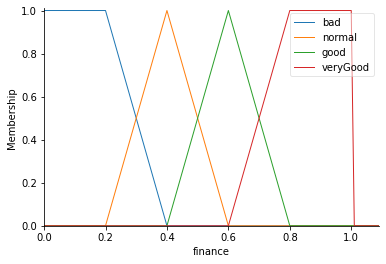

In [23]:
finance = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'finance')

finance['bad'] = fuzz.trapmf(finance.universe, [0.0, 0.0, 0.2, 0.4])
finance['normal'] = fuzz.trimf(finance.universe, [0.2, 0.4, 0.6])
finance['good'] = fuzz.trimf(finance.universe, [0.4, 0.6, 0.8])
finance['veryGood'] = fuzz.trapmf(finance.universe, [0.6, 0.8, 1.0, 1.0])

finance.view()

### Customer

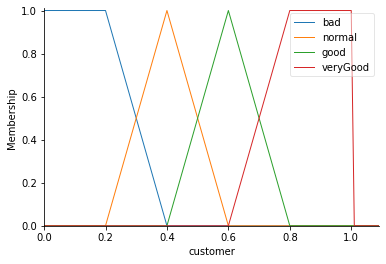

In [24]:
customer = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'customer')

customer['bad'] = fuzz.trapmf(customer.universe, [0.0, 0.0, 0.2, 0.4])
customer['normal'] = fuzz.trimf(customer.universe, [0.2, 0.4, 0.6])
customer['good'] = fuzz.trimf(customer.universe, [0.4, 0.6, 0.8])
customer['veryGood'] = fuzz.trapmf(customer.universe, [0.6, 0.8, 1.0, 1.0])

customer.view()

### Business Process

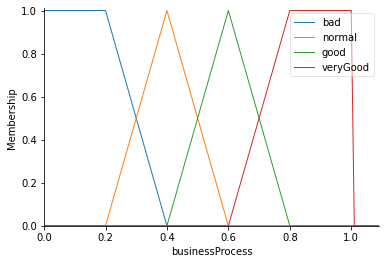

In [25]:
businessProcess = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'businessProcess')


businessProcess['bad'] = fuzz.trapmf(businessProcess.universe, [0.0, 0.0, 0.2, 0.4])
businessProcess['normal'] = fuzz.trimf(businessProcess.universe, [0.2, 0.4, 0.6])
businessProcess['good'] = fuzz.trimf(businessProcess.universe, [0.4, 0.6, 0.8])
businessProcess['veryGood'] = fuzz.trapmf(businessProcess.universe, [0.6, 0.8, 1.0, 1.0])

businessProcess.view()

### Learning Growth

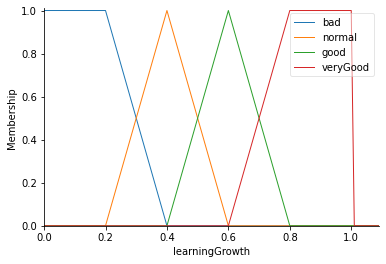

In [26]:
learningGrowth = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'learningGrowth')


learningGrowth['bad'] = fuzz.trapmf(learningGrowth.universe, [0.0, 0.0, 0.2, 0.4])
learningGrowth['normal'] = fuzz.trimf(learningGrowth.universe, [0.2, 0.4, 0.6])
learningGrowth['good'] = fuzz.trimf(learningGrowth.universe, [0.4, 0.6, 0.8])
learningGrowth['veryGood'] = fuzz.trapmf(learningGrowth.universe, [0.6, 0.8, 1.0, 1.0])

learningGrowth.view()

### Company Performance

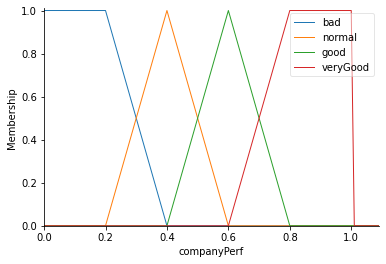

In [27]:
companyPerf = ctrl.Consequent(np.arange(0, 1.1, 0.01), 'companyPerf')

companyPerf['bad'] = fuzz.trapmf(companyPerf.universe, [0.0, 0.0, 0.2, 0.4])
companyPerf['normal'] = fuzz.trimf(companyPerf.universe, [0.2, 0.4, 0.6])
companyPerf['good'] = fuzz.trimf(companyPerf.universe, [0.4, 0.6, 0.8])
companyPerf['veryGood'] = fuzz.trapmf(companyPerf.universe, [0.6, 0.8, 1.0, 1.0])

companyPerf.view()

## FUZZY RULE

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fee443d8ad0>)

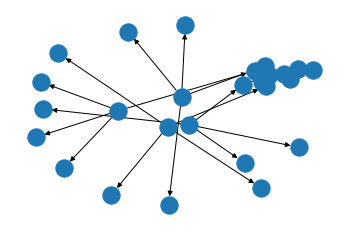

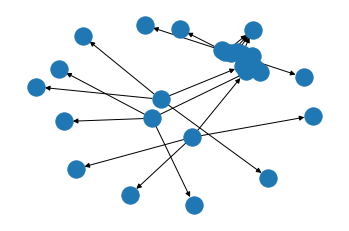

In [28]:
rule1 = ctrl.Rule(finance['veryGood'] & customer['veryGood'] & businessProcess['veryGood'] & learningGrowth['veryGood'], companyPerf['veryGood'])
rule2 = ctrl.Rule(finance['veryGood'] & customer['veryGood'] & businessProcess['veryGood'] & learningGrowth['good'], companyPerf['veryGood'])
rule3 = ctrl.Rule(finance['veryGood'] & customer['veryGood'] & businessProcess['good'] & learningGrowth['veryGood'], companyPerf['veryGood'])
rule4 = ctrl.Rule(finance['veryGood'] & customer['veryGood'] & businessProcess['good'] & learningGrowth['good'], companyPerf['good'])
rule5 = ctrl.Rule(finance['veryGood'] & customer['good'] & businessProcess['veryGood'] & learningGrowth['veryGood'], companyPerf['veryGood'])
rule6 = ctrl.Rule(finance['veryGood'] & customer['good'] & businessProcess['veryGood'] & learningGrowth['good'], companyPerf['good'])
rule7 = ctrl.Rule(finance['veryGood'] & customer['good'] & businessProcess['good'] & learningGrowth['veryGood'], companyPerf['good'])
rule8 = ctrl.Rule(finance['veryGood'] & customer['good'] & businessProcess['good'] & learningGrowth['good'], companyPerf['good'])
rule9 = ctrl.Rule(finance['good'] & customer['veryGood'] & businessProcess['veryGood'] & learningGrowth['veryGood'], companyPerf['veryGood'])
rule10 = ctrl.Rule(finance['good'] & customer['veryGood'] & businessProcess['veryGood'] & learningGrowth['good'], companyPerf['good'])
rule11 = ctrl.Rule(finance['good'] & customer['veryGood'] & businessProcess['good'] & learningGrowth['veryGood'], companyPerf['good'])
rule12 = ctrl.Rule(finance['good'] & customer['veryGood'] & businessProcess['good'] & learningGrowth['good'], companyPerf['good'])
rule13 = ctrl.Rule(finance['good'] & customer['good'] & businessProcess['veryGood'] & learningGrowth['veryGood'], companyPerf['good'])
rule14 = ctrl.Rule(finance['good'] & customer['good'] & businessProcess['veryGood'] & learningGrowth['good'], companyPerf['good'])
rule15 = ctrl.Rule(finance['good'] & customer['good'] & businessProcess['good'] & learningGrowth['veryGood'], companyPerf['good'])
rule16 = ctrl.Rule(finance['good'] & customer['good'] & businessProcess['good'] & learningGrowth['good'], companyPerf['good'])


rule1.view()
rule2.view()

## RULE APPLICATION

In [29]:
performancepoint_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])

In [30]:
performancePoint = ctrl.ControlSystemSimulation(performancepoint_ctrl)

## DEFUZZIFICATION (RESULT A)

In [33]:
for i, arr in enumerate(dataBSC):
  performancePoint.input['finance'] = arr[0]
  performancePoint.input['customer'] = arr[1]
  performancePoint.input['businessProcess'] = arr[2]
  performancePoint.input['learningGrowth'] = arr[3]
  performancePoint.compute()

  # companyPerf.view(sim=performancePoint)
  print("Performance ", i+1, " : ", performancePoint.output['companyPerf'])

Performance  1  :  0.8470491803278688
Performance  2  :  0.827587412587413
Performance  3  :  0.827587412587413
Performance  4  :  0.7280044843049325
Performance  5  :  0.8470491803278688
Performance  6  :  0.827587412587413
Performance  7  :  0.827587412587413
Performance  8  :  0.7280044843049325
Performance  9  :  0.827587412587413
Performance  10  :  0.8470491803278688
Performance  11  :  0.827587412587413
Performance  12  :  0.8470491803278688
Performance  13  :  0.827587412587413
Performance  14  :  0.7280044843049325


## DETERMINE BAD, NORMAL, GOOD, VERY GOOD EACH PERSPECTIVE

In [9]:
x_range = np.arange(0.0, 1.1, 0.1)
range_bad = fuzz.trapmf(x_range, [0.0, 0.0, 0.2, 0.4])
range_normal = fuzz.trimf(x_range, [0.2, 0.4, 0.6])
range_good = fuzz.trimf(x_range, [0.4, 0.6, 0.8])
range_veryGood = fuzz.trapmf(x_range, [0.6, 0.8, 1.0, 1.0])

for index, i in enumerate(dataBSC):
  print("YEAR ", index+1)

  # FINANCE
  bad_point_f = fuzz.interp_membership(x_range, range_bad, i[0])
  normal_point_f = fuzz.interp_membership(x_range, range_normal, i[0])
  good_point_f = fuzz.interp_membership(x_range, range_good, i[0])
  veryGood_point_f = fuzz.interp_membership(x_range, range_veryGood, i[0])

  if bad_point_f < 0.001: 
    bad_point_f = 0.0
  if normal_point_f < 0.001: 
    normal_point_f = 0.0
  if good_point_f < 0.001: 
    good_point_f = 0.0
  if veryGood_point_f < 0.001: 
    veryGood_point_f = 0.0

  print("Bad F: ", bad_point_f, ", Normal F: ", normal_point_f, ", Good F: ", good_point_f, ", Very Good F: ", veryGood_point_f)

  # Customer
  bad_point_c = fuzz.interp_membership(x_range, range_bad, i[1])
  normal_point_c = fuzz.interp_membership(x_range, range_normal, i[1])
  good_point_c = fuzz.interp_membership(x_range, range_good, i[1])
  veryGood_point_c = fuzz.interp_membership(x_range, range_veryGood, i[1])

  if bad_point_c < 0.001: 
    bad_point_c = 0.0
  if normal_point_c < 0.001: 
    normal_point_c = 0.0
  if good_point_c < 0.001: 
    good_point_c = 0.0
  if veryGood_point_c < 0.001: 
    veryGood_point_c = 0.0

  print("Bad C: ", bad_point_c, ", Normal C: ", normal_point_c, ", Good C: ", good_point_c, ", Very Good C: ", veryGood_point_c)

  # Business Process
  bad_point_bp = fuzz.interp_membership(x_range, range_bad, i[2])
  normal_point_bp = fuzz.interp_membership(x_range, range_normal, i[2])
  good_point_bp = fuzz.interp_membership(x_range, range_good, i[2])
  veryGood_point_bp = fuzz.interp_membership(x_range, range_veryGood, i[2])

  if bad_point_bp < 0.001: 
    bad_point_bp = 0.0
  if normal_point_bp < 0.001: 
    normal_point_bp = 0.0
  if good_point_bp < 0.001: 
    good_point_bp = 0.0
  if veryGood_point_bp < 0.001: 
    veryGood_point_bp = 0.0

  print("Bad BP: ", bad_point_bp, ", Normal BP: ", normal_point_bp, ", Good BP: ", good_point_bp, ", Very Good BP: ", veryGood_point_bp)
  
  # Learning Growth
  bad_point_lg = fuzz.interp_membership(x_range, range_bad, i[3])
  normal_point_lg = fuzz.interp_membership(x_range, range_normal, i[3])
  good_point_lg = fuzz.interp_membership(x_range, range_good, i[3])
  veryGood_point_lg = fuzz.interp_membership(x_range, range_veryGood, i[3])

  if bad_point_lg < 0.001: 
    bad_point_lg = 0.0
  if normal_point_lg < 0.001: 
    normal_point_lg = 0.0
  if good_point_lg < 0.001: 
    good_point_lg = 0.0
  if veryGood_point_lg < 0.001: 
    veryGood_point_lg = 0.0

  print("Bad LG: ", bad_point_lg, ", Normal LG: ", normal_point_lg, ", Good LG: ", good_point_lg, ", Very Good LG: ", veryGood_point_lg)

  print("")

YEAR  1
Bad F:  0.0 , Normal F:  0.0 , Good F:  0.0 , Very Good F:  1.0
Bad C:  0.0 , Normal C:  0.0 , Good C:  0.0 , Very Good C:  1.0
Bad BP:  0.0 , Normal BP:  0.0 , Good BP:  0.0 , Very Good BP:  1.0
Bad LG:  0.0 , Normal LG:  0.0 , Good LG:  0.0 , Very Good LG:  1.0

YEAR  2
Bad F:  0.0 , Normal F:  0.0 , Good F:  0.0 , Very Good F:  1.0
Bad C:  0.0 , Normal C:  0.0 , Good C:  0.0 , Very Good C:  1.0
Bad BP:  0.0 , Normal BP:  0.0 , Good BP:  0.5000000000000002 , Very Good BP:  0.4999999999999996
Bad LG:  0.0 , Normal LG:  0.0 , Good LG:  0.0 , Very Good LG:  1.0

YEAR  3
Bad F:  0.0 , Normal F:  0.0 , Good F:  0.0 , Very Good F:  1.0
Bad C:  0.0 , Normal C:  0.0 , Good C:  0.5000000000000002 , Very Good C:  0.4999999999999996
Bad BP:  0.0 , Normal BP:  0.0 , Good BP:  0.0 , Very Good BP:  1.0
Bad LG:  0.0 , Normal LG:  0.0 , Good LG:  0.0 , Very Good LG:  1.0

YEAR  4
Bad F:  0.0 , Normal F:  0.0 , Good F:  0.5000000000000002 , Very Good F:  0.4999999999999996
Bad C:  0.0 , Norma

In [10]:
x_range = np.arange(0.0, 1.1, 0.1)
range_bad = fuzz.trapmf(x_range, [0.0, 0.0, 0.2, 0.4])
range_normal = fuzz.trimf(x_range, [0.2, 0.4, 0.6])
range_good = fuzz.trimf(x_range, [0.4, 0.6, 0.8])
range_veryGood = fuzz.trapmf(x_range, [0.6, 0.8, 1.0, 1.0])

bad_point_f = fuzz.interp_membership(x_range, range_bad, 0.65)
normal_point_f = fuzz.interp_membership(x_range, range_normal, 0.65)
good_point_f = fuzz.interp_membership(x_range, range_good, 0.65)
veryGood_point_f = fuzz.interp_membership(x_range, range_veryGood, 0.65)
print("Bad F: ", bad_point_f, ",Normal F: ", normal_point_f, ",Good F: ", good_point_f, ",Very Good F: ", veryGood_point_f)

Bad F:  0.0 ,Normal F:  0.0 ,Good F:  0.7499999999999999 ,Very Good F:  0.25000000000000006


Performance :  0.8470491803278688


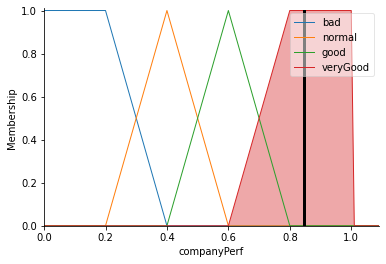

In [11]:
performancePoint.input['finance'] = 0.8
performancePoint.input['customer'] = 0.8
performancePoint.input['businessProcess'] = 0.8
performancePoint.input['learningGrowth'] = 0.8
performancePoint.compute()

companyPerf.view(sim=performancePoint)
  # print(i, arr, arr[0], arr[1], arr[2], arr[3])
print("Performance : ", performancePoint.output['companyPerf'])

# BLCA

## Calculate A

### Without Fuzzy

In [13]:
# def calculateAccumulatedAvg(finance, customer, businessProcess, learning):
#     accumulatedAvg = (finance + customer + businessProcess + learning) / 4
#     return [finance, customer, businessProcess, learning, accumulatedAvg]

In [14]:
# Count Average (A) for each year
# def addEnv(dataBsc):
#     bsc_env = []
#     for x in dataBsc:
#         bsc_env.append(calculateAccumulatedAvg(x[0], x[1], x[2], x[3]))
#     return bsc_env

# print(addEnv(dataBSC))

### WITH FUZZY

In [57]:
def fuzzyLogic(dataBSC):
  dataFuzzyA = []
  for index, x in enumerate(dataBSC):
    performancePoint.input['finance'] = x[0]
    performancePoint.input['customer'] = x[1]
    performancePoint.input['businessProcess'] = x[2]
    performancePoint.input['learningGrowth'] = x[3]
    performancePoint.compute()
    dataFuzzyA.append(performancePoint.output['companyPerf'])
    # print("A", index+1, ": ", performancePoint.output['companyPerf'])

  return dataFuzzyA

dataFuzzy = fuzzyLogic(dataBSC)
for i in range(len(dataFuzzy)):
  print("A Year ", i+1, " : ", dataFuzzy[i])

A Year  1  :  0.8470491803278688
A Year  2  :  0.827587412587413
A Year  3  :  0.827587412587413
A Year  4  :  0.7280044843049325
A Year  5  :  0.8470491803278688
A Year  6  :  0.827587412587413
A Year  7  :  0.827587412587413
A Year  8  :  0.7280044843049325
A Year  9  :  0.827587412587413
A Year  10  :  0.8470491803278688
A Year  11  :  0.827587412587413
A Year  12  :  0.8470491803278688
A Year  13  :  0.827587412587413
A Year  14  :  0.7280044843049325


## Calculate AA

In [75]:
# Count Accumulate Average (AA) for spesific year
def calculateAA(start, currYear, data):
    # data = fuzzyLogic(dataBSC)
    AA = 0.0
    sum_AA = 0.0
    for x in range(start, currYear):
        sum_AA += data[x]
    if start == 0:
        AA = sum_AA / currYear
    else:
        AA = sum_AA
    return AA

for i in range(0,14):
  print("AA Year ", i+1, " : ", calculateAA(0, i+1, fuzzyLogic(dataBSC)))

AA Year  1  :  0.8470491803278688
AA Year  2  :  0.8373182964576409
AA Year  3  :  0.8340746685008983
AA Year  4  :  0.8075571224519068
AA Year  5  :  0.8154555340270992
AA Year  6  :  0.8174775137871514
AA Year  7  :  0.8189217850443316
AA Year  8  :  0.8075571224519067
AA Year  9  :  0.8097827102447407
AA Year  10  :  0.8135093572530534
AA Year  11  :  0.8147891804652679
AA Year  12  :  0.8174775137871513
AA Year  13  :  0.8182551983102483
AA Year  14  :  0.8118087187384401


## Egg Contribution

In [66]:
# Get External Factor
def generateExternalFactorEgg(rouletteWheel):
    # Negative Factors
    N_NEUTRAL = 0.0 # neutral parameter
    N_COMPETITION = 0.25 # competition parameter
    N_FINANCIAL = 0.25 # financial parameter
    N_RECESSION = 0.5 # recession parameter

    # Probability Factors
    P_NEUTRAL = 0.2 # neutral parameter
    P_COMPETITION = 0.45 # competition parameter
    P_FINANCIAL = 0.7 # financial parameter
    P_RECESSION = 1.0 # recession parameter

    neutral = 0
    financial = 0
    competition = 0
    recession = 0
    contribution = 0.0
        
    if (rouletteWheel >= 0 and rouletteWheel <= P_NEUTRAL): 
        neutral = 1
    elif (rouletteWheel > P_NEUTRAL and rouletteWheel <= P_FINANCIAL): 
        financial = 1
    elif (rouletteWheel > P_FINANCIAL and rouletteWheel <= P_COMPETITION): 
        competition = 1
    else: 
        recession = 1
        
    contribution = (neutral * N_NEUTRAL + financial * N_FINANCIAL + competition * N_COMPETITION + recession * N_RECESSION) / 4

    return -1 * contribution

# print(generateExternalFactorEgg(0.7865))

In [67]:
# Count Contribution (Cont) from egg state for each year
def getContributionEgg(dataExtEgg):
    bsc_cont_egg = []
    for x in dataExtEgg:
        bsc_cont_egg.append(generateExternalFactorEgg(x))
        # print(x)
        # print(bsc_cont_egg)
    return bsc_cont_egg

contributionEgg = getContributionEgg(dataExtEgg)
for i in range(len(contributionEgg)):
  print("Egg Contribution Year ", i+1, " : ", contributionEgg[i])

Egg Contribution Year  1  :  -0.0
Egg Contribution Year  2  :  -0.0625
Egg Contribution Year  3  :  -0.125
Egg Contribution Year  4  :  -0.125


## Caterpillar Contribution

In [18]:
# Get External Factor
def generateExternalFactorCaterpillar(rouletteWheel):
    # Negative - Positive Parameter
    N_NEUTRAL = 0.0 # neutral parameter negative
    N_COMPETITION = 0.17 # competition parameter negative
    N_FINANCIAL = 0.17 # financial parameter negative
    N_RECESSION = 0.33 # recession parameter negative
    N_ECONOMIC_GROWTH = 0.33 # economic growth parameter positive

    # Probability Parameter
    P_NEUTRAL = 0.1 # neutral parameter probability
    P_COMPETITION = 0.27 # competition parameter probability
    P_FINANCIAL = 0.44 # financial parameter probability
    P_RECESSION = 0.72 # recession parameter probability
    P_ECONOMIC_GROWTH = 1.0 # economic growth parameter probability
    
    neutral = 0
    financial = 0
    competition = 0
    recession = 0
    economicGrowth = 0

    if (rouletteWheel >= 0 and rouletteWheel <= P_NEUTRAL):
        neutral = 1
    elif (rouletteWheel > P_NEUTRAL and rouletteWheel <= P_FINANCIAL):
        financial = 1
    elif (rouletteWheel > P_FINANCIAL and rouletteWheel <= P_COMPETITION):
        competition = 1
    elif (rouletteWheel > P_COMPETITION and rouletteWheel <= P_RECESSION):
        recession = 1
    else:
        economicGrowth = 1
    
    if economicGrowth == 1:
        return economicGrowth / 17
    else:
        return -1 *(neutral * N_NEUTRAL + financial * N_FINANCIAL + competition * N_COMPETITION + recession * N_RECESSION) / 17

In [65]:
# Get External Factor Caterpillar (Contribution)
def getContributionCaterpillar(dataExtCat):
    bsc_cont_cat = []
    for x in dataExtCat:
        bsc_cont_cat.append(generateExternalFactorCaterpillar(x))
    return bsc_cont_cat

contributionCaterpillar = getContributionCaterpillar(dataExtCat)
for i in range(len(contributionCaterpillar)):
  print("Caterpillar Contribution Year ", i+5, " : ", contributionCaterpillar[i])

Caterpillar Contribution Year  5  :  0.058823529411764705
Caterpillar Contribution Year  6  :  -0.01
Caterpillar Contribution Year  7  :  -0.01
Caterpillar Contribution Year  8  :  0.058823529411764705
Caterpillar Contribution Year  9  :  -0.019411764705882354
Caterpillar Contribution Year  10  :  0.058823529411764705
Caterpillar Contribution Year  11  :  0.058823529411764705
Caterpillar Contribution Year  12  :  -0.019411764705882354
Caterpillar Contribution Year  13  :  -0.019411764705882354
Caterpillar Contribution Year  14  :  -0.0


## Average A from Egg Phase

In [76]:
# Get Average A from Egg Phase (AA for Egg Phase)
def getAvgAEgg(data):
    # data = fuzzyLogic(dataBSC)
    avg_A = 0.0
    for x in range(4):
        avg_A += data[x]
    avg_A /= 4
    return avg_A

print("AA for Egg Phase : ", getAvgAEgg(fuzzyLogic(dataBSC)))

AA for Egg Phase :  0.8075571224519068


## Calculate Q (Company Performance)

In [77]:
# Calculate Company Performance Per Year
def calculateCompanyPerformance_withCaterpillar(currYear, dataBSC):
    companyPerformance = 0.0
    if currYear <= 4:  # Egg
        companyPerformance = calculateAA(0, currYear, fuzzyLogic(dataBSC))  # Get Q
        # Get Contribution - HARD CODE DUMMY DATA
        contEgg = getContributionEgg(dataExtEgg)
        for x in range(currYear):
            companyPerformance += contEgg[x]
    else:  # Caterpillar
        companyPerformance = (calculateAA(4, currYear, fuzzyLogic(dataBSC)) + getAvgAEgg(fuzzyLogic(dataBSC))) / (currYear - 4 + 1)  # Get Q
        # Get Contribution - HARD CODE DUMMY DATA
        contCat = getContributionCaterpillar(dataExtCat)
        for y in range(currYear-4):
            companyPerformance += contCat[y]
    return companyPerformance

## RESULT

In [78]:
print("Performance Each Year:")
for (x, index) in enumerate(range(14)):
    print("Year ",index+1," : ", calculateCompanyPerformance_withCaterpillar(x+1, dataBSC), "({:.2f})".format(calculateCompanyPerformance_withCaterpillar(x+1, dataBSC)))

Performance Each Year:
Year  1  :  0.8470491803278688 (0.85)
Year  2  :  0.7748182964576409 (0.77)
Year  3  :  0.6465746685008983 (0.65)
Year  4  :  0.4950571224519068 (0.50)


NameError: ignored